In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

from scipy.stats import zscore

# Exploratory Data Analysis

In [2]:
customer_df = pd.read_csv('airline_customer_satisfaction.csv')

for col in customer_df.describe(include='object').columns:
    customer_df[col] = customer_df[col].apply(lambda x: x.lower())
customer_df = customer_df.rename(str.lower, axis='columns')

customer_df.head()

,satisfaction,customer type,age,type of travel,class,flight distance,seat comfort,departure/arrival time convenient,food and drink,gate location,...,online support,ease of online booking,on-board service,leg room service,baggage handling,checkin service,cleanliness,online boarding,departure delay in minutes,arrival delay in minutes
0,satisfied,loyal customer,65,personal travel,eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,loyal customer,47,personal travel,business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,loyal customer,15,personal travel,eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,loyal customer,60,personal travel,eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,loyal customer,70,personal travel,eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
customer_df.describe()

,age,flight distance,seat comfort,departure/arrival time convenient,food and drink,gate location,inflight wifi service,inflight entertainment,online support,ease of online booking,on-board service,leg room service,baggage handling,checkin service,cleanliness,online boarding,departure delay in minutes,arrival delay in minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
customer_df.describe(include='object')

,satisfaction,customer type,type of travel,class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,loyal customer,business travel,business
freq,71087,106100,89693,62160


In [5]:
for col in customer_df.describe(include='object').columns:
    print(col)
    print(customer_df[col].unique())
    print('-' * 60)

satisfaction
['satisfied' 'dissatisfied']
------------------------------------------------------------
customer type
['loyal customer' 'disloyal customer']
------------------------------------------------------------
type of travel
['personal travel' 'business travel']
------------------------------------------------------------
class
['eco' 'business' 'eco plus']
------------------------------------------------------------


## Missing Values

In [6]:
customer_df.isnull().sum()

satisfaction                           0
customer type                          0
age                                    0
type of travel                         0
class                                  0
flight distance                        0
seat comfort                           0
departure/arrival time convenient      0
food and drink                         0
gate location                          0
inflight wifi service                  0
inflight entertainment                 0
online support                         0
ease of online booking                 0
on-board service                       0
leg room service                       0
baggage handling                       0
checkin service                        0
cleanliness                            0
online boarding                        0
departure delay in minutes             0
arrival delay in minutes             393
dtype: int64

In [7]:
customer_df['arrival delay in minutes'].fillna(0, inplace=True)

## Distribution Analysis

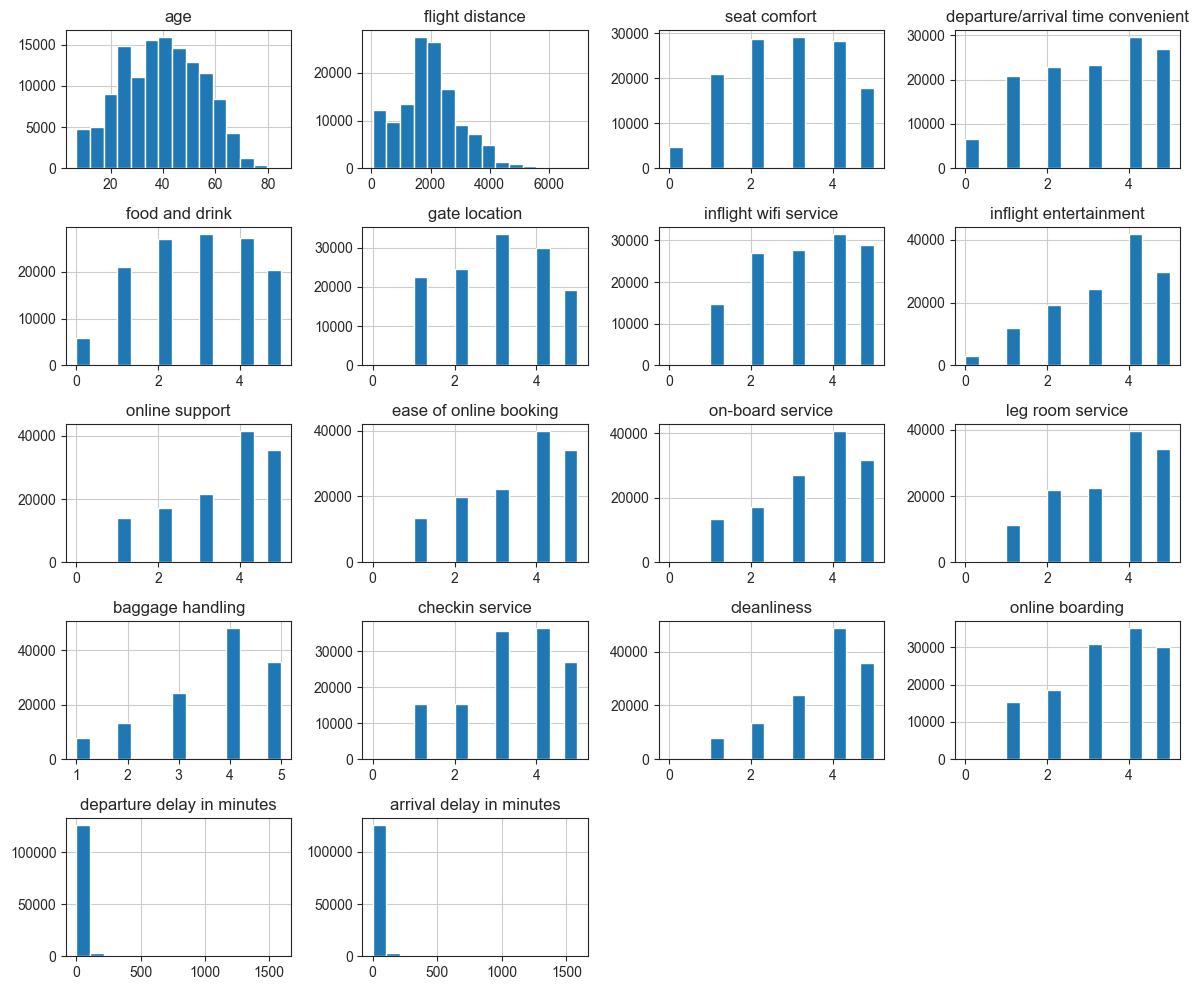

In [8]:
numerical_data = customer_df.select_dtypes(include=['int64', 'float64'])
sns.set_style('ticks')
customer_df[numerical_data.columns].hist(bins=15, figsize=(12, 10), layout=(5, 4))

plt.tight_layout()
plt.show()

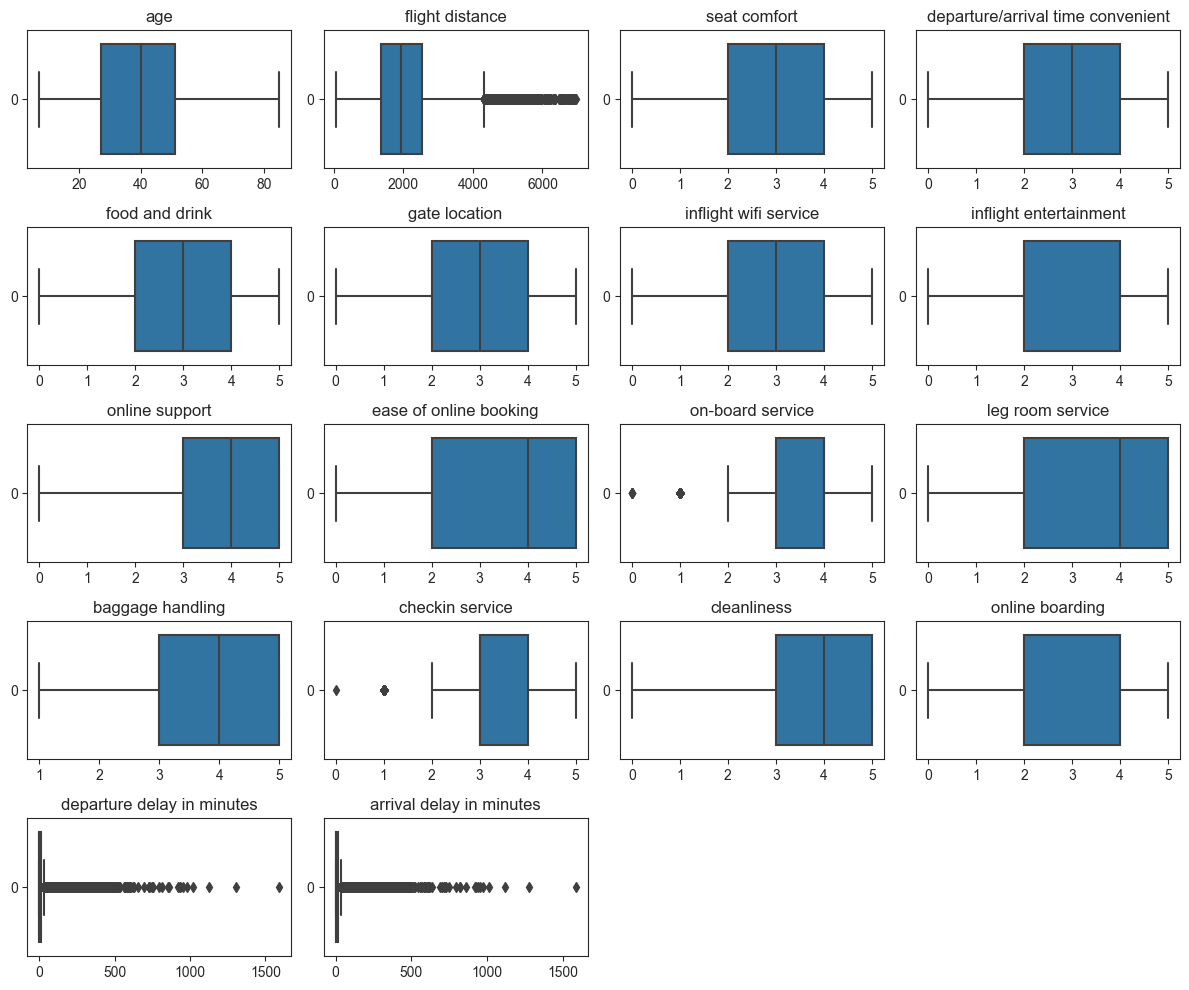

In [9]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_data.columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(customer_df[col], orient='h')
    plt.title(col)
    
plt.tight_layout()
plt.show()

## Satisfaction

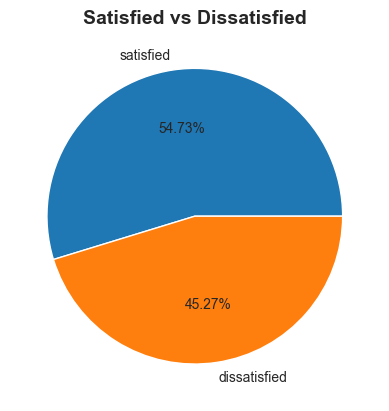

In [10]:
plt.title('Satisfied vs Dissatisfied', fontsize=14, weight='bold')
plt.pie(x=customer_df['satisfaction'].value_counts(), labels=customer_df['satisfaction'].value_counts().index,
        radius=1, autopct='%.2f%%', textprops={'fontsize': 10})

plt.show()

## Customer Type

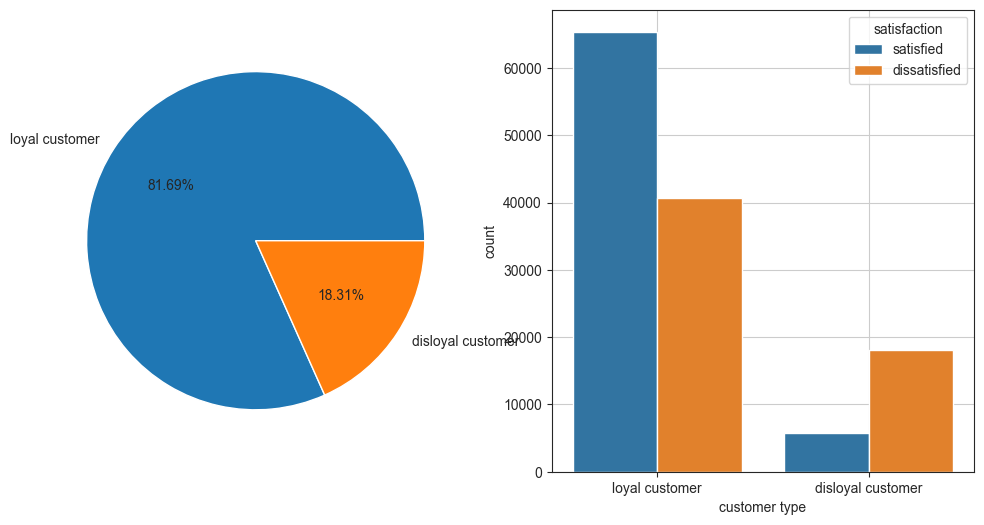

In [11]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(x=customer_df['customer type'].value_counts(), labels=customer_df['customer type'].value_counts().index,
        radius=1, autopct='%.2f%%', textprops={'fontsize': 10})

sns.countplot(data=customer_df, x='customer type', hue='satisfaction', ax=ax[1])
ax[1].grid(True)

plt.show()

## Type of Travel

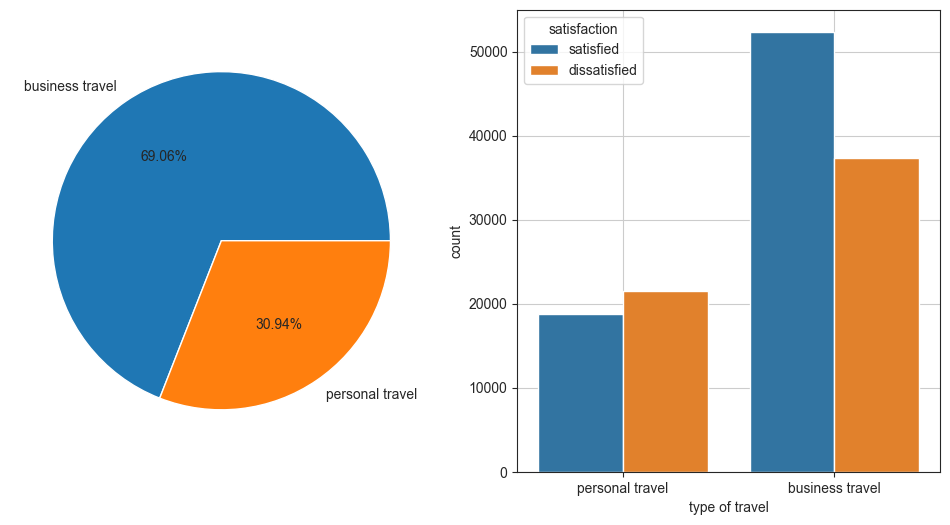

In [12]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(x=customer_df['type of travel'].value_counts(), labels=customer_df['type of travel'].value_counts().index,
          radius=1, autopct='%.2f%%', textprops={'fontsize': 10})

sns.countplot(data=customer_df, x='type of travel', hue='satisfaction', ax=ax[1])
ax[1].grid(True)

plt.show()

## Class

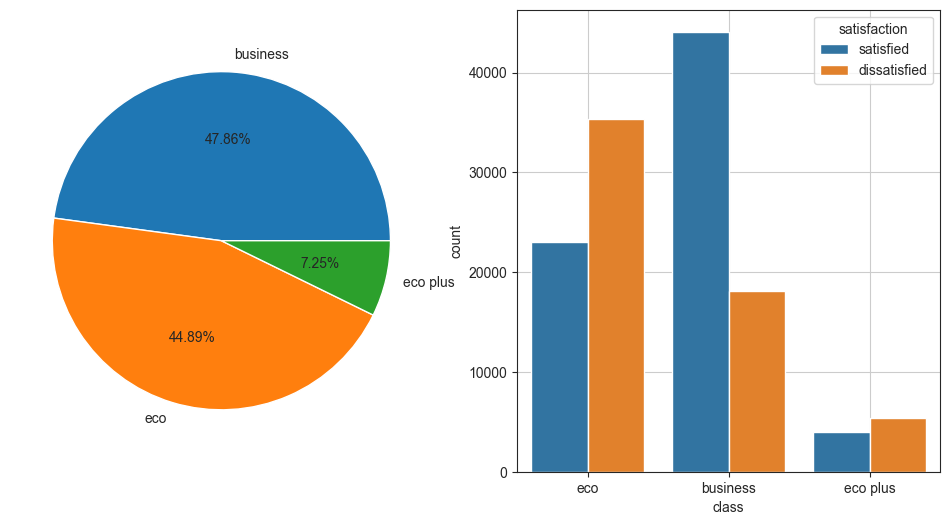

In [13]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(x=customer_df['class'].value_counts(), labels=customer_df['class'].value_counts().index,
          radius=1, autopct='%.2f%%', textprops={'fontsize': 10})

sns.countplot(data=customer_df, x='class', hue='satisfaction', ax=ax[1])
ax[1].grid(True)

plt.show()

## Proportion of Delayed Flights

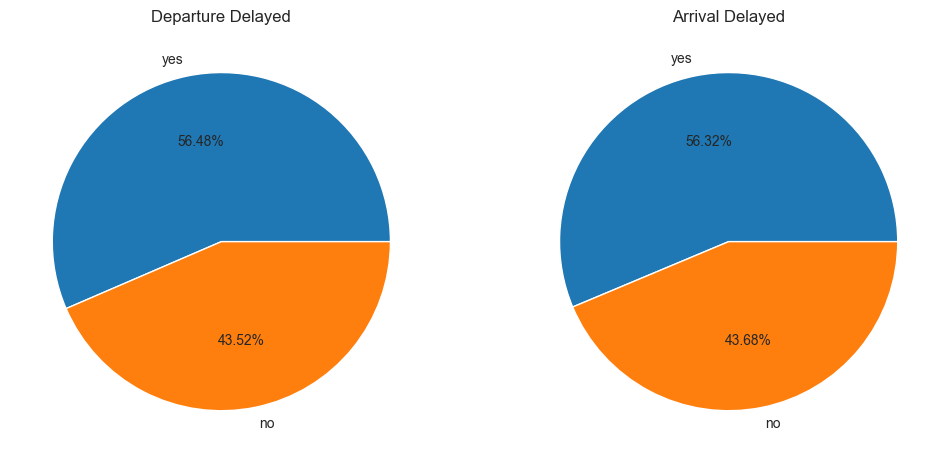

In [14]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))

delayed = pd.DataFrame((customer_df['departure delay in minutes'] > 0) * 1)
delayed.rename(columns={'departure delay in minutes': 'departure delayed'}, inplace=True)
delayed['arrival delayed'] = (customer_df['arrival delay in minutes'] > 0) * 1

ax[0].pie(x=delayed['departure delayed'].value_counts(), labels=['yes', 'no'],
          radius=1, autopct='%.2f%%', textprops={'fontsize': 10})
ax[0].title.set_text('Departure Delayed')

ax[1].pie(x=delayed['arrival delayed'].value_counts(), labels=['yes', 'no'],
          radius=1, autopct='%.2f%%', textprops={'fontsize': 10})
ax[1].title.set_text('Arrival Delayed')

plt.show()

## Mapping Satisfaction to Binary

In [15]:
customer_df['satisfaction'] = customer_df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)
new_numerical_data = customer_df.select_dtypes(include=['int64', 'float64'])

customer_df['satisfaction'].describe()

count    129880.000000
mean          0.547328
std           0.497757
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: satisfaction, dtype: float64

## Correlation Matrix

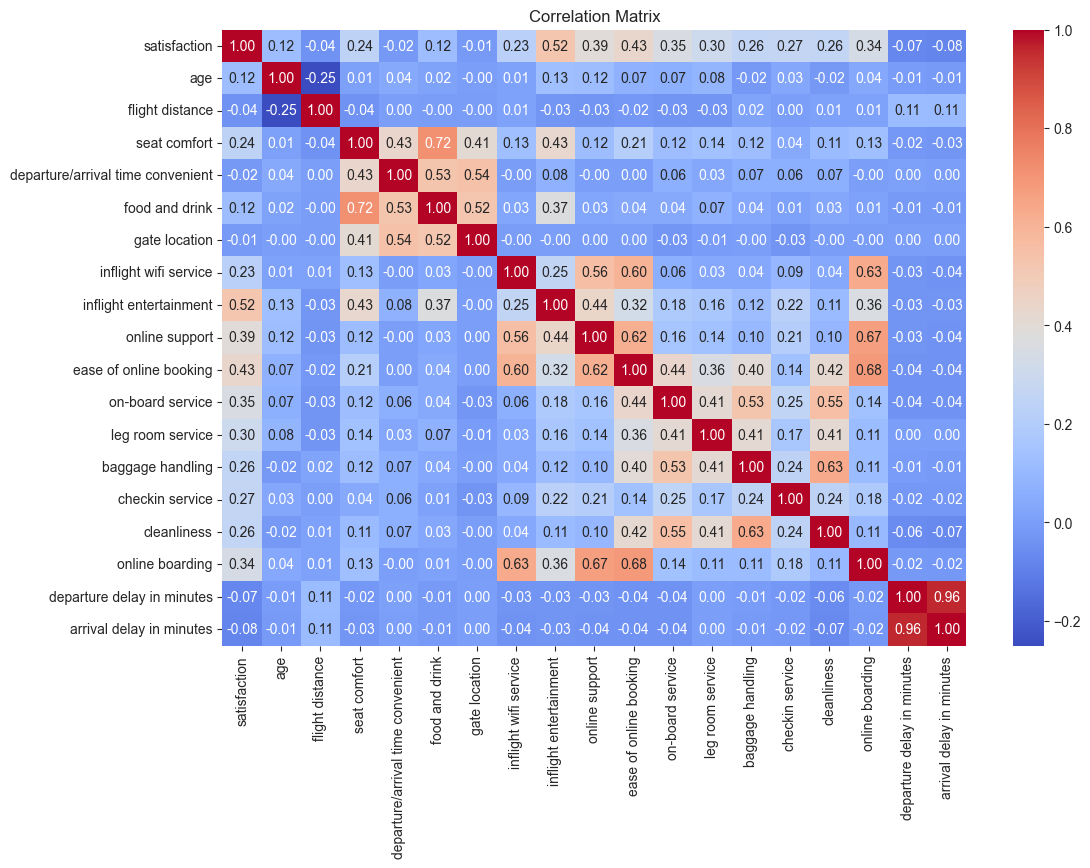

In [16]:
correlation_matrix = new_numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

plt.show()

## Outliers

In [17]:
# removing the reviews
possible_outliers = [col for col in numerical_data.columns if col not in numerical_data.columns[2:16]]

z_scores = customer_df[possible_outliers].apply(zscore)
threshold = 3
z_outliers = (z_scores < -threshold) | (z_scores > threshold)

q1 = customer_df[numerical_data.columns].quantile(0.25)
q3 = customer_df[numerical_data.columns].quantile(0.75)
iqr = q3 - q1
iqr_outliers = (customer_df[numerical_data.columns] < (q1 - 1.5 * iqr)) | (customer_df[numerical_data.columns] > (q3 + 1.5 * iqr))

outliers = pd.DataFrame(z_outliers.sum(), columns=['Z-Score Outliers'])
outliers['IQR Outliers'] = iqr_outliers.sum()
outliers

,Z-Score Outliers,IQR Outliers
age,25,0
flight distance,830,2581
departure delay in minutes,2748,18098
arrival delay in minutes,2742,17492


In [18]:
z_filtered_customer_df = customer_df[~z_outliers.any(axis=1)]
z_filtered_customer_df.reset_index(drop=True, inplace=True)

z_filtered_customer_df.describe()

,satisfaction,age,flight distance,seat comfort,departure/arrival time convenient,food and drink,gate location,inflight wifi service,inflight entertainment,online support,ease of online booking,on-board service,leg room service,baggage handling,checkin service,cleanliness,online boarding,departure delay in minutes,arrival delay in minutes
count,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000,126135.000000
mean,0.551496,39.487597,1939.653585,2.843184,2.988766,2.854323,2.989622,3.254727,3.386903,3.525865,3.478178,3.472185,3.484188,3.695112,3.343346,3.718373,3.353891,10.346510,10.623023
std,0.497343,15.105851,987.017014,1.396069,1.528320,1.445152,1.306409,1.317685,1.346010,1.305571,1.305833,1.268834,1.295876,1.158673,1.258546,1.145796,1.297969,21.024108,21.214746
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1332.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,40.000000,1898.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,51.000000,2507.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,10.000000,11.000000
max,1.000000,80.000000,5062.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,128.000000,130.000000


In [19]:
iqr_filtered_customer_df = customer_df[~iqr_outliers.any(axis=1)]
iqr_filtered_customer_df.reset_index(drop=True, inplace=True)

iqr_filtered_customer_df.describe()

,satisfaction,age,flight distance,seat comfort,departure/arrival time convenient,food and drink,gate location,inflight wifi service,inflight entertainment,online support,ease of online booking,on-board service,leg room service,baggage handling,checkin service,cleanliness,online boarding,departure delay in minutes,arrival delay in minutes
count,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000,86469.000000
mean,0.619077,39.996924,1904.459020,2.893072,3.036499,2.872764,2.969608,3.293539,3.507731,3.627855,3.614162,3.813482,3.632724,3.883854,3.705316,3.909494,3.438932,3.447097,3.446842
std,0.485616,15.022893,957.733864,1.408467,1.539547,1.449957,1.323055,1.302970,1.337997,1.289858,1.241804,0.993711,1.216626,1.061282,0.971361,1.042621,1.273267,6.714955,6.697319
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,1293.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
50%,1.000000,41.000000,1885.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,51.000000,2494.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000
max,1.000000,85.000000,4321.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.000000


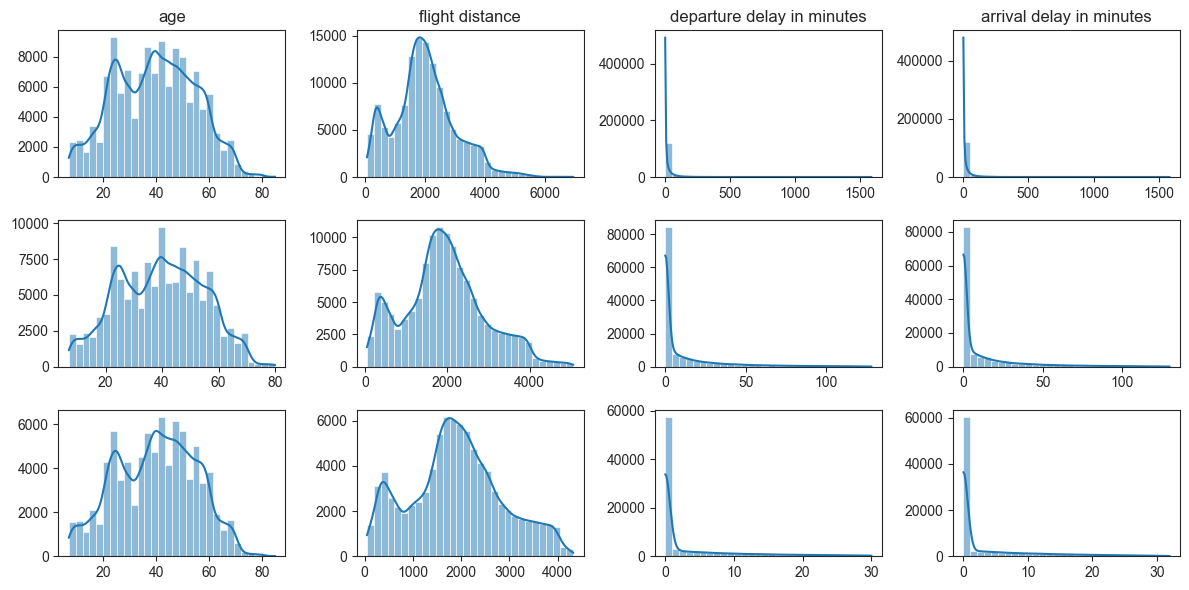

In [20]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(possible_outliers, 1):
    plt.subplot(3, 4, i)
    sns.histplot(customer_df[col], bins=30, kde=True)
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('')

plt.subplot(3, 4, 5)
plt.ylabel('Z-Score Outliers')
for i, col in enumerate(possible_outliers, 1):
    plt.subplot(3, 4, i + 4)
    sns.histplot(z_filtered_customer_df[col], bins=30, kde=True)
    plt.xlabel('')
    plt.ylabel('')

plt.subplot(3, 4, 9)
plt.ylabel('IQR Outliers')
for i, col in enumerate(possible_outliers, 1):
    plt.subplot(3, 4, i + 8)
    sns.histplot(iqr_filtered_customer_df[col], bins=30, kde=True)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### Delays Outliers

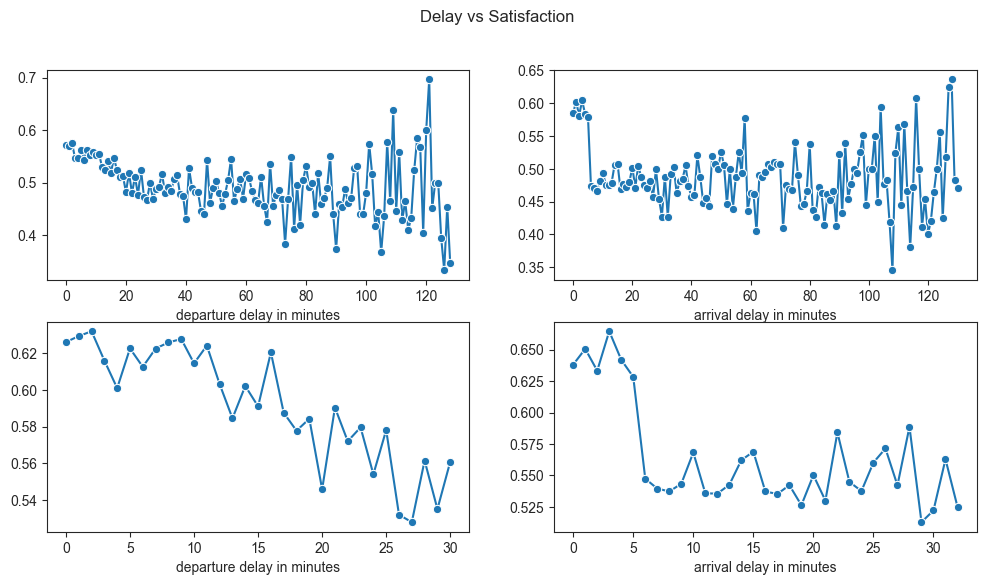

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Delay vs Satisfaction')

z_departure_delay_satisfaction = (z_filtered_customer_df.groupby('departure delay in minutes')['satisfaction']
                                .value_counts(normalize=True).unstack())
z_arrival_delay_satisfaction = (z_filtered_customer_df.groupby('arrival delay in minutes')['satisfaction']
                                .value_counts(normalize=True).unstack())
iqr_departure_delay_satisfaction = (iqr_filtered_customer_df.groupby('departure delay in minutes')['satisfaction']
                                .value_counts(normalize=True).unstack())
iqr_arrival_delay_satisfaction = (iqr_filtered_customer_df.groupby('arrival delay in minutes')['satisfaction']
                              .value_counts(normalize=True).unstack())

sns.lineplot(x=z_departure_delay_satisfaction[1].index, y=z_departure_delay_satisfaction[1].values, marker='o', ax=ax[0][0])
sns.lineplot(x=z_arrival_delay_satisfaction[1].index, y=z_arrival_delay_satisfaction[1].values, marker='o', ax=ax[0][1])
sns.lineplot(x=iqr_departure_delay_satisfaction[1].index, y=iqr_departure_delay_satisfaction[1].values, marker='o', ax=ax[1][0])
sns.lineplot(x=iqr_arrival_delay_satisfaction[1].index, y=iqr_arrival_delay_satisfaction[1].values, marker='o', ax=ax[1][1])

plt.show()

In [22]:
outlier_rows_zscore = z_outliers.loc[:, ['age', 'flight distance']].any(axis=1)
outlier_rows_iqr = iqr_outliers.loc[:, ['arrival delay in minutes', 'departure delay in minutes']].any(axis=1)

filtered_customer_df = pd.DataFrame(customer_df[~(outlier_rows_zscore | outlier_rows_iqr)])
filtered_customer_df.reset_index(drop=True, inplace=True)
filtered_customer_df.describe()

,satisfaction,age,flight distance,seat comfort,departure/arrival time convenient,food and drink,gate location,inflight wifi service,inflight entertainment,online support,ease of online booking,on-board service,leg room service,baggage handling,checkin service,cleanliness,online boarding,departure delay in minutes,arrival delay in minutes
count,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000,108493.000000
mean,0.563022,39.517480,1940.013162,2.852083,2.990009,2.856829,2.986414,3.264165,3.401639,3.536542,3.491691,3.486695,3.492769,3.706377,3.355922,3.731116,3.365701,3.452794,3.516024
std,0.496015,15.111907,989.119539,1.403169,1.531669,1.448520,1.307933,1.316338,1.346188,1.303699,1.302990,1.266094,1.293839,1.158161,1.256202,1.145283,1.296802,6.726031,6.764906
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1330.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,40.000000,1897.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,51.000000,2510.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,1.000000,80.000000,5062.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.000000


# Dummy Variables

In [24]:
customer_dummy_df = pd.get_dummies(filtered_customer_df, drop_first=True) * 1
customer_dummy_df.head()

,satisfaction,age,flight distance,seat comfort,departure/arrival time convenient,food and drink,gate location,inflight wifi service,inflight entertainment,online support,...,baggage handling,checkin service,cleanliness,online boarding,departure delay in minutes,arrival delay in minutes,customer type_loyal customer,type of travel_personal travel,class_eco,class_eco plus
0,1,65,265,0,0,0,2,2,4,2,...,3,5,3,2,0,0.0,1,1,1,0
1,1,15,2138,0,0,0,3,2,0,2,...,4,4,4,2,0,0.0,1,1,1,0
2,1,60,623,0,0,0,3,3,4,3,...,1,4,1,3,0,0.0,1,1,1,0
3,1,70,354,0,0,0,3,4,3,4,...,2,4,2,5,0,0.0,1,1,1,0
4,1,30,1894,0,0,0,3,2,0,2,...,5,5,4,2,0,0.0,1,1,1,0


# Multicollinearity

In [25]:
vif_variables = customer_dummy_df.drop(['satisfaction'], axis=1)

vif = pd.DataFrame(np.array(
    [[variance_inflation_factor(vif_variables.values, i) for i in range(vif_variables.shape[1])],
     np.array(vif_variables.columns)]
), index=['VIF', 'features']).T

vif

,VIF,features
0,8.274373,age
1,4.620352,flight distance
2,13.034545,seat comfort
3,8.828941,departure/arrival time convenient
4,13.732877,food and drink
5,10.101243,gate location
6,14.058246,inflight wifi service
7,14.040235,inflight entertainment
8,19.146503,online support
9,32.066787,ease of online booking


# Logistic Regression

In [26]:
targets = customer_dummy_df['satisfaction']
inputs = customer_dummy_df.drop(['satisfaction'], axis=1)

In [27]:
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.25, random_state=13)

y_test.reset_index(drop=True, inplace=True)

In [29]:
reg: LogisticRegression = LogisticRegression().fit(x_train, y_train)

## Weights and Bias

In [30]:
features = np.append('bias', inputs.columns.values)
weights = np.append(reg.intercept_, reg.coef_)

logit_summary = pd.DataFrame(features, columns=['Features'])
logit_summary['Weights'] = weights

logit_summary

,Features,Weights
0,bias,0.471724
1,age,-0.152506
2,flight distance,-0.188347
3,seat comfort,0.408423
4,departure/arrival time convenient,-0.334834
5,food and drink,-0.357678
6,gate location,0.189011
7,inflight wifi service,-0.180949
8,inflight entertainment,0.977646
9,online support,0.152628


# Testing

## Confusion Matrix

<Figure size 800x600 with 0 Axes>

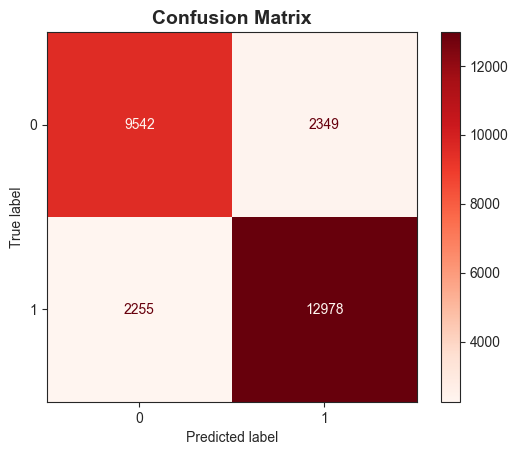

In [31]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(reg, x_test, y_test, cmap='Reds')
plt.title('Confusion Matrix', fontsize=14, weight='bold')

plt.show()

## Accuracy

In [32]:
predicted_y = reg.predict(x_test)
table = confusion_matrix(predicted_y, y_test)

accuracy = np.trace(table) / np.sum(table)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8303


## ROC Curve

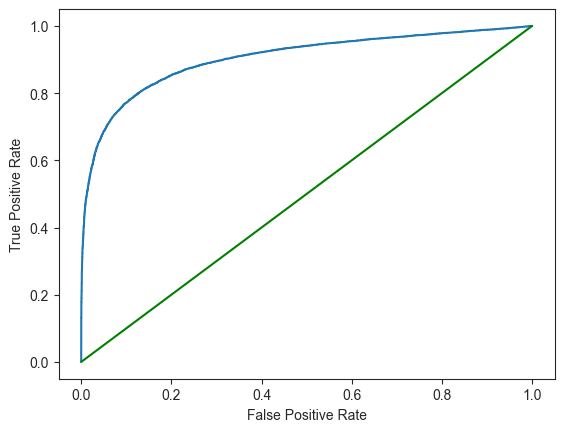

In [33]:
predicted_y_prob = reg.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, predicted_y_prob[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

plt.plot([0, 1], [0, 1], color='g')

In [34]:
roc_score = roc_auc_score(y_test, predicted_y_prob[:, 1])
print(f'ROC AUC: {roc_score:.4f}')

ROC AUC: 0.9039
